In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
policy_smoke = pd.read_csv('policy_smoke.csv')

#change the variable types to categorical variable
for i in [3, 4, 5, 7, 8, 9]:
    policy_smoke.iloc[:, i] = policy_smoke.iloc[:, i].astype('category')


In [3]:
#check the category order
for i in [3, 4, 5, 7, 8, 9]:
    print(policy_smoke.iloc[:, i].cat.categories)

Int64Index([-2, -1, 0, 1, 2, 3], dtype='int64')
Float64Index([-1.0, 0.0, 1.0, 2.0], dtype='float64')
Int64Index([-1, 0, 1, 2], dtype='int64')
Int64Index([2, 4, 5], dtype='int64')
Int64Index([2, 3, 4, 5], dtype='int64')
Float64Index([2.0, 3.0, 4.0, 5.0], dtype='float64')


In [4]:
#reorder the category levels to make 0 as the reference category in the regression models
policy_smoke['ban_policy_change'] = pd.Categorical(policy_smoke.ban_policy_change, categories = [0, -2, -1, 1, 2, 3])
policy_smoke['tax_policy_change'] = pd.Categorical(policy_smoke.tax_policy_change, categories = [0, -1, 1, 2])
policy_smoke['support_policy_change'] = pd.Categorical(policy_smoke.support_policy_change, categories = [0, -1, 1, 2])

for i in [3, 4, 5]:
    print(policy_smoke.iloc[:, i].cat.categories)

Int64Index([0, -2, -1, 1, 2, 3], dtype='int64')
Int64Index([0, -1, 1, 2], dtype='int64')
Int64Index([0, -1, 1, 2], dtype='int64')


### Formal Analysis:

The next step after the exploratory data analysis is to perform a formal analysis which involves using </br> an appropriate statistical model. The model that will be used here is Ordinary Least Squares Linear Regression.


The explanatory variables are ban_policy_change, tax_policy_change, support_policy_change, initial_ban_policy, </br> initial_support_policy, and initial_tax_policy, all of which are categorical variables. The response variable is the prevalence_rate_change </br> which is the percentage point change in smoking population for each country. The idea here is to determine how much of the change in </br> smoking rate decline is associated to change in policies while holding the initial policy system constant.

Stricter tax policies act as a negative incentive because with increase in taxes, there is increase in retail prices. This makes a good starting point for the analysis.

#### Prevalence Rate Change against Tax policy:


In [5]:
tax_model = ols('prevalence_rate_change ~ tax_policy_change + initial_tax_policy', data = policy_smoke).fit()
print(tax_model.summary())


                              OLS Regression Results                              
Dep. Variable:     prevalence_rate_change   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                 -0.020
Method:                     Least Squares   F-statistic:                    0.4723
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):              0.828
Time:                            20:35:44   Log-Likelihood:                -386.60
No. Observations:                     162   AIC:                             787.2
Df Residuals:                         155   BIC:                             808.8
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Taking the confidence interval and $p$-values into account, it seems that none of the regression coefficients seem to be significant under $5$% significance level.</br>
The assumptions of the regression models should be checked before any kind of conclusion is made.

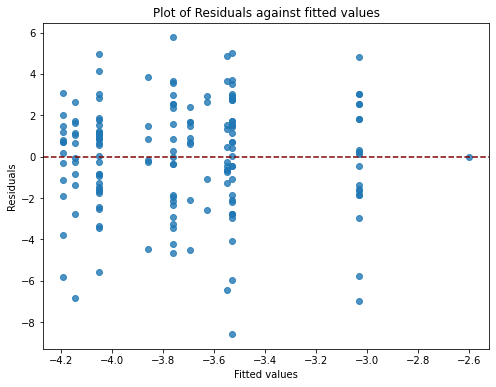

In [6]:
#Do the residuals have mean 0 and constant variance?
plt.figure(figsize=(8, 6))
sns.regplot(x = tax_model.fittedvalues, y = tax_model.resid, fit_reg = False)
plt.axhline(y = 0, linestyle = '--', color = 'maroon')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Plot of Residuals against fitted values')
plt.show()

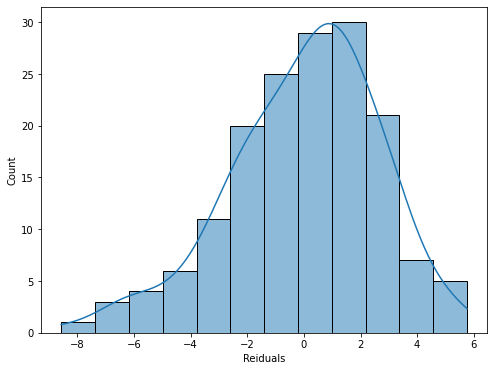

In [7]:
#are the residuals normally distributed?
plt.figure(figsize=(8, 6))
sns.histplot(x= tax_model.resid, kde = True)
plt.xlabel('Reiduals')
plt.ylabel('Count')
plt.show()

Interpretation of the plots:

The plot of residuals against fitted values seems to be reasonably good. It appears that the residuals</br> have mean zero and constant variance.
The histogram of the residuals is slightly left skewed, but overall </br> it does not seem to invalidate the assumption of normality.
 

In a similar vein, simple models can be fitted using change in ban policy and change in support policy</br> as explanatory variables.

#### Prevalence Rate change against Ban policy:

In [8]:
ban_model = ols('prevalence_rate_change ~ ban_policy_change + initial_ban_policy', data = policy_smoke).fit()
print(ban_model.summary())

                              OLS Regression Results                              
Dep. Variable:     prevalence_rate_change   R-squared:                       0.040
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.9230
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):              0.490
Time:                            20:35:49   Log-Likelihood:                -387.50
No. Observations:                     163   AIC:                             791.0
Df Residuals:                         155   BIC:                             815.8
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Again none of the variables seems to significant under $5%$ significance level. But before any conclusion is made, </br> the assumptions are needed to be checked.

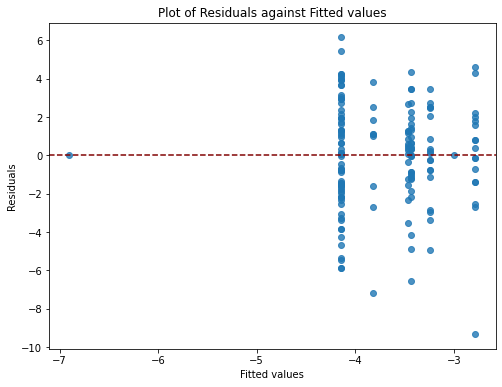

In [9]:
#Do the residuals have mean zero and constant variance?
plt.figure(figsize=(8,6))
sns.regplot(x = ban_model.fittedvalues, y = ban_model.resid, fit_reg = False)
plt.axhline(y = 0, linestyle = '--', color = 'maroon')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Plot of Residuals against Fitted values')
plt.show()

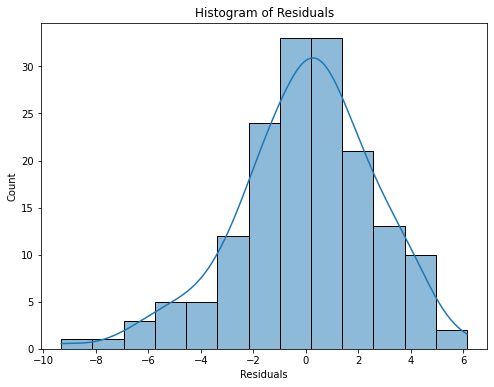

In [10]:
#Are the residuals normally distributed?
plt.figure(figsize=(8,6))
sns.histplot(x = ban_model.resid, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

Interpretation of the plots:

Histogram of the residuals is normally distributed. </br>
From the plot of residuals against fitted values, zero mean assumption seems to valid, however the constant</br> variance assumption seems to be violated.

In [11]:
#identify the outlier in the residual plot
policy_smoke.iloc[ban_model.resid[ban_model.resid < -8].index, :]

#removing this observation will not be sensible in this case. The reason is that the country is already on
#strict policies and the marked change in rate could be the effect of that.

,country,country_code,continent,ban_policy_change,tax_policy_change,support_policy_change,prevalence_rate_change,initial_ban_policy,initial_support_policy,initial_tax_policy
118,Nepal,NPL,Asia,1,0,0,-12.099998,4,4,3.0


#### Prevalence Rate Change against Support policy:

In [12]:
support_model = ols('prevalence_rate_change ~ support_policy_change + initial_support_policy', data = policy_smoke).fit()
print(support_model.summary())

                              OLS Regression Results                              
Dep. Variable:     prevalence_rate_change   R-squared:                       0.033
Model:                                OLS   Adj. R-squared:                 -0.004
Method:                     Least Squares   F-statistic:                    0.8913
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):              0.503
Time:                            20:35:49   Log-Likelihood:                -388.09
No. Observations:                     163   AIC:                             790.2
Df Residuals:                         156   BIC:                             811.8
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Checking the assumptions for this model:

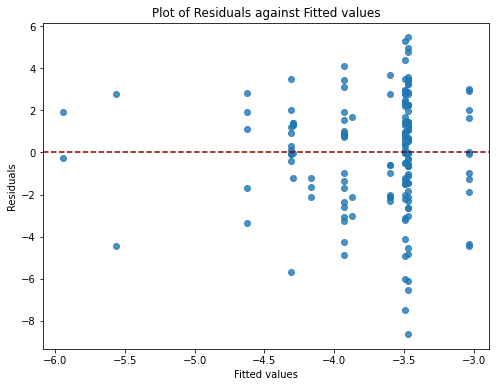

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x = support_model.fittedvalues, y = support_model.resid, fit_reg = False)
plt.axhline(y = 0, linestyle = '--', color = 'maroon')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Plot of Residuals against Fitted values')
plt.show()

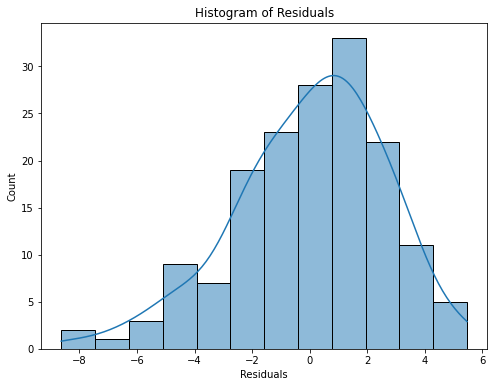

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(x = support_model.resid, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

Interpretation of plots:

The zero mean assumption is seen to be valid as judged from the residuals v/s fitted values plot. But again</br> the constant variance assumption seems to be invalid.
The normality of residuals assumption appears to be valid from the histogram.

The full model can now be fitted to the data.

##### Prevalence Rate change against Ban policy, Tax policy, and Support Policy.

In [15]:
full_model = ols('prevalence_rate_change ~ ban_policy_change + tax_policy_change + support_policy_change + initial_ban_policy + initial_tax_policy + initial_support_policy',
            data = policy_smoke).fit()

print(full_model.summary())

                              OLS Regression Results                              
Dep. Variable:     prevalence_rate_change   R-squared:                       0.103
Model:                                OLS   Adj. R-squared:                 -0.017
Method:                     Least Squares   F-statistic:                    0.8561
Date:                    Sat, 04 Mar 2023   Prob (F-statistic):              0.637
Time:                            20:35:50   Log-Likelihood:                -379.28
No. Observations:                     162   AIC:                             798.6
Df Residuals:                         142   BIC:                             860.3
Df Model:                              19                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Judging the significance of the coefficients by the 95% confidence interval produced, only the $ban\_policy\_change[T:1]$ </br> seems to be significant as it does not include zero. On a similar note, one can look at the p-values and make inference</br> about the significance of the regression coefficients.

But the regression coefficient for that category is positive, which means the prevalence rate increases when the category takes the value of one. </br>
Again, prior to making any conclusion the assumptions related to the model should be checked.

##### Assessing model fit

The assumptions to check with diagnostic plots are:
1. The residuals have mean zero.
2. The residuals have constant variance
3. The residuals are normally distributed.

A plot of residuals against fitted values are used to assess the first two assumptions:

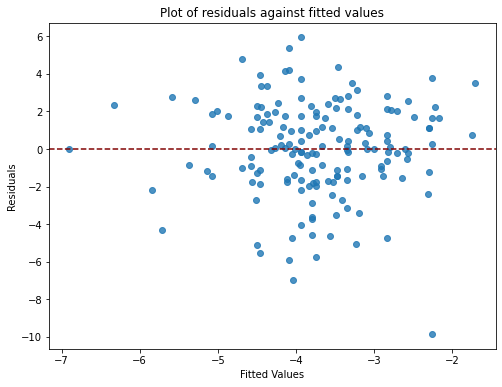

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x = full_model.fittedvalues, y = full_model.resid, fit_reg=False, ci = 'none')
plt.axhline(y=0, linestyle = '--', color = 'maroon')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Plot of residuals against fitted values')
plt.show()

The outlier in the residual v/s fitted value plot is associated with 'Nepal'. The reason for not removing this observation is already stated above.

The assumption of normality of residuals is checked using a histogram of the residuals.

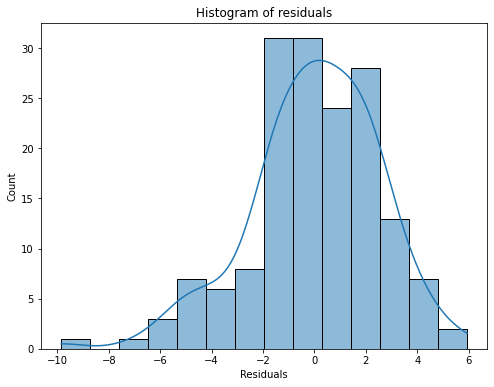

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(x = full_model.resid, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of residuals')
plt.show()

Interpretation of the plots:

From the first plot of residuals against fitted values, the mean zero assumption seems to be valid. </br> But the assumption of constant variance is questionable.

The histogram of the residuals is slightly left skewed but, it is not too skewed to invalidate the assumption.

A critical view on that standard errors:
Some of the standard errors in the final model, which takes into account all the variables together, </br> seem to be inflated. This can be viewed as a result of lower sample size for that particular category, while keeping other categories constant. </br>
A wider time frame and hence more data can be taken into account in order to make a more accurate model.

### Final Remarks:
A total of three simple linear regression models and one multiple linear regression model was fitted to </br> the data, all of which used categorical variables as explanatory variables. Of those, only the model that regressed </br> prevalence rate change against tax policies came out to be valid with respect to all the assumptions.

Other models can be rejected on the basis of violation of constant variance assumption as, this violation </br> leads to incorrect standard errors and hence incorrect conclusions about the coefficients.

The model that used tax policies as explanatory variable had the null hypothesis that, there is no association between </br> prevalence rate change and tax policies. The model failed to reject that null hypothesis at $5$% significance level.